## Plotting options 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9, inferno, viridis
from datashader.utils import export_image
from functools import partial
background = "black"

In [3]:
img_map = partial(export_image, export_path="ikeda_maps", background=background)

### Ikeda map

#### Function definition

In [4]:
def ikeda_attractor(u, x, y):
    tt = 0.4 - 6/(1+ x**2 + y**2)
    xx = 1 + u*(x*np.cos(tt) - y*np.sin(tt))
    yy = u*(x*np.sin(tt) + y*np.cos(tt))
    return xx, yy

In [5]:
def ikeda_map(u, x0, y0, iterar):
    x, y = x0, y0
    x_list, y_list = np.array([]), np.array([])
    for i in range(iterar):
        x, y = ikeda_attractor(u, x, y)
        x_list = np.append(x_list, x)
        y_list = np.append(y_list, y)
    return x_list, y_list

### Domain

In [6]:
x = np.random.randn(10000)
y = np.random.randn(10000)
x_list, y_list = ikeda_map(.996, x, y, 500)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)

### Density `datashader`  plot 

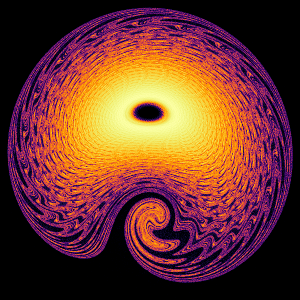

In [15]:
cvs1 = ds.Canvas(plot_width = 300, plot_height = 300,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"ikedaHist")

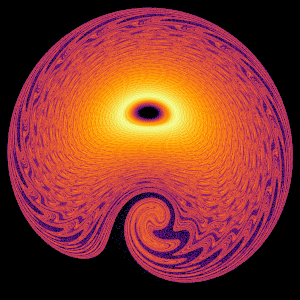

In [16]:
cvs1 = ds.Canvas(plot_width = 300, plot_height = 300,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='log')
img_map(img,"ikedaLog")

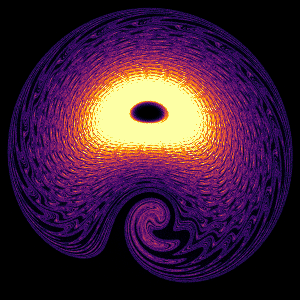

In [17]:
cvs1 = ds.Canvas(plot_width = 300, plot_height = 300,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='linear', span = [0,200])
img_map(img,"ikedaLinear")